* Rahil Sayyad
* rahilsayyad389@gmail.com

## import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## read Dataset

In [2]:
df=pd.read_csv("crime_data.csv")

In [3]:
df.head(15)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
# check null values
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
#delete Unnamed: 0 column
df.drop("Unnamed: 0",axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x19577a2a970>,
 'caps': [<matplotlib.lines.Line2D at 0x19577a2af10>,
 'boxes': [<matplotlib.lines.Line2D at 0x19577a2a6a0>,
 'medians': [<matplotlib.lines.Line2D at 0x19577a4c4f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19577a4c7c0>,
 'means': []}

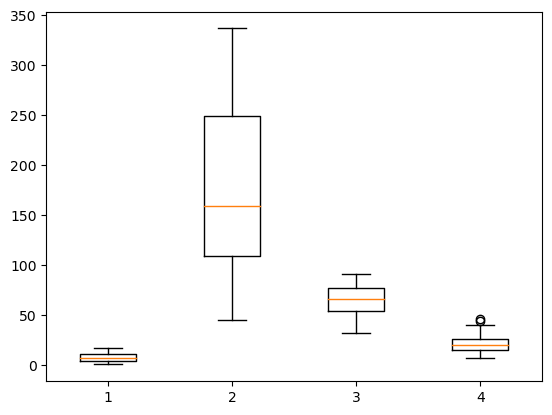

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(df)

C:\Users\Rahil\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rahil\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rahil\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rahil\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

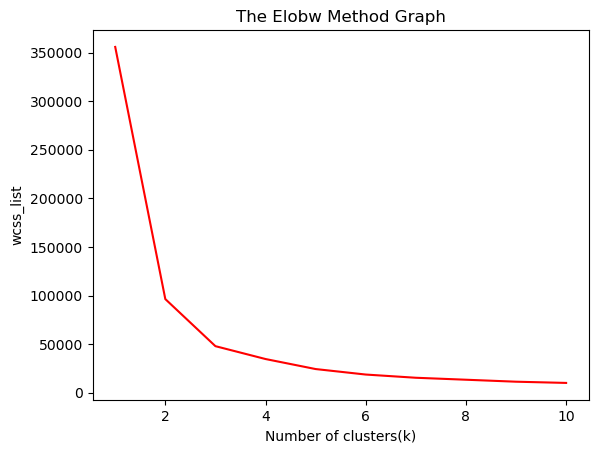

In [25]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(df)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list,color='r')  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

## fitting a clustering model

In [8]:
from sklearn.cluster import k_means
km = KMeans(n_clusters=3,init='k-means++')

In [9]:
# fit the data
km.fit(df)

C:\Users\Rahil\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rahil\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [10]:
# predict
pred=km.predict(df)

In [11]:
pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
silhouette_score(df,pred)

0.5319024108339816

## Here we fitting a Hierarchical model

In [14]:
from sklearn.cluster import AgglomerativeClustering
Hierarchical=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

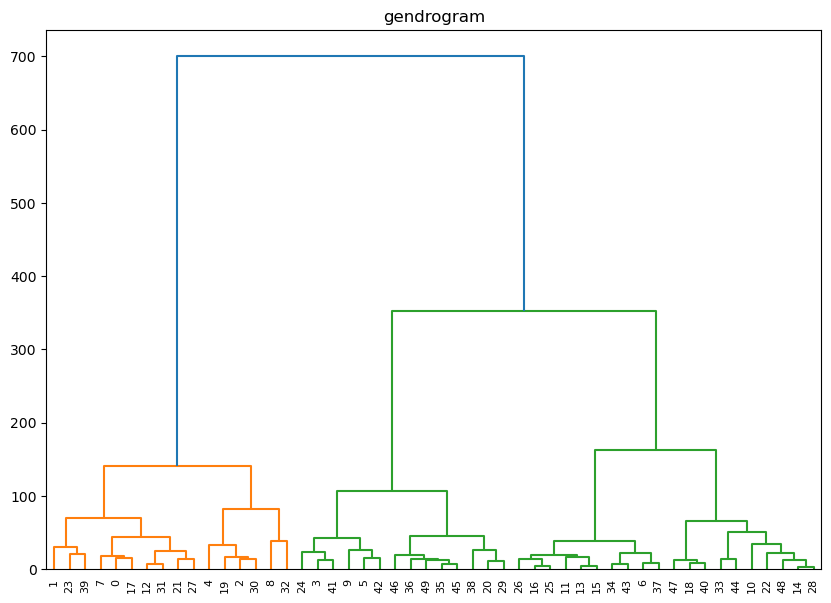

In [15]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("gendrogram")
dend=shc.dendrogram(shc.linkage(df,method="ward"))

In [16]:
pred=Hierarchical.fit_predict(df)

C:\Users\Rahil\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [17]:
pred

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
from sklearn.metrics import silhouette_score
silhouette_score(df,pred)

0.576270501827592

In [19]:
df["h_clusterid"]=pred

In [20]:
df

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,0


## Here we fitting a Hierarchical model

In [21]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4)

In [22]:
db.fit(df)

DBSCAN(eps=3, min_samples=4)

In [23]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)